# ****
# Data Pre-processing & K-Means Clustering Program Sectors.
# ****

In [106]:
# Import relevant Python packages for program-specific purposes with ML --> K-Means Clustering sections.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# Setup the interactive notebook mode.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [107]:
sen_data = pd.read_csv("weekendOutputWithPolarity.csv")

In [108]:
sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,The Weeknd,2023-04-16 19:08:28+00:00,positive,0.22
1,1647678153257517057,Rap301_,"The Weeknd, 21 Savage &amp; Diddy At Coachella...",The Weeknd,2023-04-16 19:07:38+00:00,neutral,0.00
2,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,The Weeknd,2023-04-16 19:07:37+00:00,positive,0.25
3,1647678032235184130,R4FAELLAA,roads - portishead\nredbone - childish gambino...,The Weeknd,2023-04-16 19:07:09+00:00,negative,-0.20
4,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,The Weeknd,2023-04-16 19:06:45+00:00,positive,0.15


In [109]:
sen_data.isna().sum()

tweet_id      0
Username      0
text          0
Artist        0
created_at    0
sentiment     0
polarity      0
dtype: int64

In [110]:
sen_data.dropna(inplace=True)

In [111]:
sen_data.reset_index().head()

,index,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,0,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,The Weeknd,2023-04-16 19:08:28+00:00,positive,0.22
1,1,1647678153257517057,Rap301_,"The Weeknd, 21 Savage &amp; Diddy At Coachella...",The Weeknd,2023-04-16 19:07:38+00:00,neutral,0.00
2,2,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,The Weeknd,2023-04-16 19:07:37+00:00,positive,0.25
3,3,1647678032235184130,R4FAELLAA,roads - portishead\nredbone - childish gambino...,The Weeknd,2023-04-16 19:07:09+00:00,negative,-0.20
4,4,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,The Weeknd,2023-04-16 19:06:45+00:00,positive,0.15


In [112]:
Kval = 6

sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist         object
created_at     object
sentiment      object
polarity      float64
dtype: object

In [113]:
# Mapping and Encoding data values within the sen_data Pandas DataFrame.
artist_map = {'The Weeknd' : 0, 'Red Hot Chili Peppers' : 1, 'Soulja Boy' : 2} # Mapping per artist.
sen_data = sen_data.applymap(lambda x : artist_map.get(x) if x in artist_map else x) # Application per artist.

sentiment_map = {'positive' : 0, 'neutral' : 1, 'negative' : 2} # Mapping per sentiment type.
sen_data = sen_data.applymap(lambda x : sentiment_map.get(x) if x in sentiment_map else x) # Application per sentiment type.

sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,0,2023-04-16 19:08:28+00:00,0,0.22
1,1647678153257517057,Rap301_,"The Weeknd, 21 Savage &amp; Diddy At Coachella...",0,2023-04-16 19:07:38+00:00,1,0.00
2,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,0,2023-04-16 19:07:37+00:00,0,0.25
3,1647678032235184130,R4FAELLAA,roads - portishead\nredbone - childish gambino...,0,2023-04-16 19:07:09+00:00,2,-0.20
4,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,0,2023-04-16 19:06:45+00:00,0,0.15


In [114]:
# Altering the datetime column of created_at to %YYYY formatting.
sen_data['created_at'] = pd.to_datetime(sen_data['created_at']).dt.strftime('%Y')

sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,0,2023,0,0.22
1,1647678153257517057,Rap301_,"The Weeknd, 21 Savage &amp; Diddy At Coachella...",0,2023,1,0.00
2,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,0,2023,0,0.25
3,1647678032235184130,R4FAELLAA,roads - portishead\nredbone - childish gambino...,0,2023,2,-0.20
4,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,0,2023,0,0.15


In [115]:
sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist          int64
created_at     object
sentiment       int64
polarity      float64
dtype: object

In [116]:
sen_data['created_at'] = sen_data['created_at'].astype(int)

In [117]:
sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist          int64
created_at      int64
sentiment       int64
polarity      float64
dtype: object

In [118]:
# Define function required for the importing of viz libraries. 
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [119]:
correl = sen_data.corr()

trace = go.Heatmap(z=correl.values,
                   x=correl.index.values,
                   y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [120]:
sen_data.columns

sen_data.head()

Index(['tweet_id', 'Username', 'text', 'Artist', 'created_at', 'sentiment',
       'polarity'],
      dtype='object')

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,0,2023,0,0.22
1,1647678153257517057,Rap301_,"The Weeknd, 21 Savage &amp; Diddy At Coachella...",0,2023,1,0.00
2,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,0,2023,0,0.25
3,1647678032235184130,R4FAELLAA,roads - portishead\nredbone - childish gambino...,0,2023,2,-0.20
4,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,0,2023,0,0.15


In [121]:
cols1 = ['tweet_id', 'Username', 'created_at']
cols2 = ['polarity', 'sentiment', 'Artist']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

subset_data = pd.DataFrame(sc.fit_transform(sen_data[cols2]), columns = sen_data[cols2].columns, index = sen_data.index)

subset_data.head()


,polarity,sentiment,Artist
0,0.51,-1.15,0.00
1,-0.43,0.40,0.00
2,0.66,-1.15,0.00
3,-1.30,1.96,0.00
4,0.22,-1.15,0.00


# K-Means Clustering.

In [122]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = Kval,
            init = 'k-means++',
            n_init = 10,
            max_iter = 500,
            random_state = 50)
data_km = pd.DataFrame(km.fit_predict(subset_data), index = subset_data.index)

data_km.head()

,0
0,3
1,2
2,3
3,5
4,3


In [123]:
data_km.rename(columns = {0:'cluster'}, inplace = True)

data_km = data_km.merge(sen_data, left_index = True, right_index = True)

data_km.head()

,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,3,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,0,2023,0,0.22
1,2,1647678153257517057,Rap301_,"The Weeknd, 21 Savage &amp; Diddy At Coachella...",0,2023,1,0.00
2,3,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,0,2023,0,0.25
3,5,1647678032235184130,R4FAELLAA,roads - portishead\nredbone - childish gambino...,0,2023,2,-0.20
4,3,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,0,2023,0,0.15


In [126]:
plot_data = []

for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))
    
# Add the following for cluster centroids.
# df_cc = pd.DataFrame(km.cluster_centers_)
# plot_data.append(go.Scatter(x=df_cc[1], y=df_cc[0],
#                           # text=df['name'],
#                             name='cluster center', mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

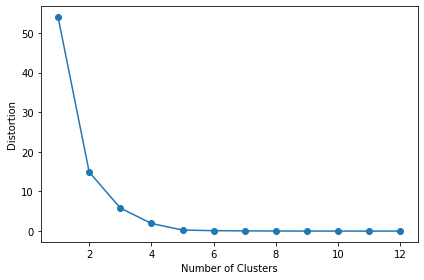

In [132]:
distortions = []
for i in range(1, 13):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(subset_data[['sentiment', 'polarity']])
    distortions.append(km.inertia_)
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

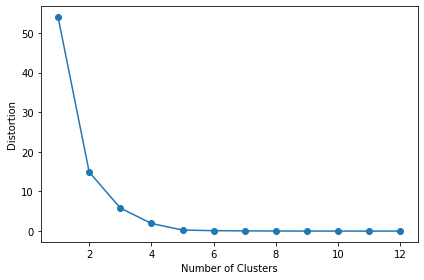

In [142]:
distortions = []
for i in range(1,13):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(subset_data)
    distortions.append(km.inertia_)
plt.plot(range(1,13), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# Agglomerative Clustering.

In [140]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=None,
                             distance_threshold=1.0,
                             affinity='euclidean',
                             linkage='complete')
data_ac = pd.DataFrame(ac.fit_predict(subset_data), index=subset_data.index)
data_ac.head()

data_ac.rename(columns={0 : 'cluster'}, inplace=True)
data_ac = data_ac.merge(sen_data, left_index=True, right_index=True)
data_ac.head()

,0
0,1
1,3
2,1
3,0
4,1


,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,0,2023,0,0.22
1,3,1647678153257517057,Rap301_,"The Weeknd, 21 Savage &amp; Diddy At Coachella...",0,2023,1,0.00
2,1,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,0,2023,0,0.25
3,0,1647678032235184130,R4FAELLAA,roads - portishead\nredbone - childish gambino...,0,2023,2,-0.20
4,1,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,0,2023,0,0.15


In [141]:
plot_data = []
for clus in set(data_ac['cluster']):
    df = data_ac[data_ac['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

# K-Means Clustering --> Positive Polarity - Sentiment Analysis.

In [143]:
pos_sen_data = sen_data[sen_data['polarity'] > 0.0]
pos_sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,0,2023,0,0.22
2,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,0,2023,0,0.25
4,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,0,2023,0,0.15
10,1647374337211604992,ejbinvestments,"The Canadian singer-songwriter, born Abel Makk...",0,2023,0,0.50
15,1646877075427426304,iYara_twt,@abelsinitation same heree i love his name so ...,0,2023,0,0.48


In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

pos_pol = pd.DataFrame(sc.fit_transform(pos_sen_data[cols2]), columns=pos_sen_data[cols2].columns, index=pos_sen_data.index)

pos_pol.head()

len(pos_pol)

,polarity,sentiment,Artist
0,-0.87,0.00,0.00
2,-0.64,0.00,0.00
4,-1.33,0.00,0.00
10,1.07,0.00,0.00
15,0.94,0.00,0.00


10

In [145]:
from sklearn.cluster import KMeans

km_pos = KMeans(n_clusters = 6,
            init='k-means++',
            n_init=10,
            max_iter=500,
            random_state=50)
data_km = pd.DataFrame(km_pos.fit_predict(pos_pol[cols2]), index=pos_pol[cols2].index)

In [146]:
data_km.rename(columns={0 : 'cluster'}, inplace=True)
data_km = data_km.merge(sen_data, left_index=True, right_index=True)
data_km.head()

,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,0,1647678363824189441,thatguyshaq1,@franlyfunguses @KvillainyHipHop Yh copium was...,0,2023,0,0.22
2,4,1647678147830382594,secretpeps,Yoo my spotify pie The Weeknd first on my list...,0,2023,0,0.25
4,2,1647677929021734914,onedmyfalls,@rpnickson Drake's voice kinda looks like the ...,0,2023,0,0.15
10,1,1647374337211604992,ejbinvestments,"The Canadian singer-songwriter, born Abel Makk...",0,2023,0,0.50
15,3,1646877075427426304,iYara_twt,@abelsinitation same heree i love his name so ...,0,2023,0,0.48


In [147]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))
    
# Added the succeeding source-code for cluster centers.
# df_cc = pd.DataFrame(km_pos.cluster_centers_)
# plot_data.append(go.Scatter(x=df_cc[1], y=df_cc[0],
#                             text=df['name'],
#                             name='cluster center', mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

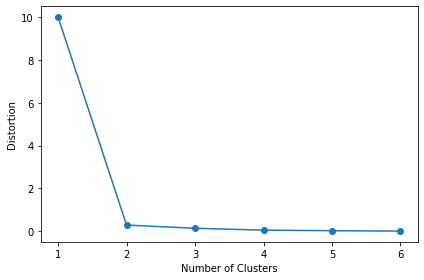

In [150]:
distortions = []
for i in range(1,7):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(pos_pol[['sentiment', 'polarity']])
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

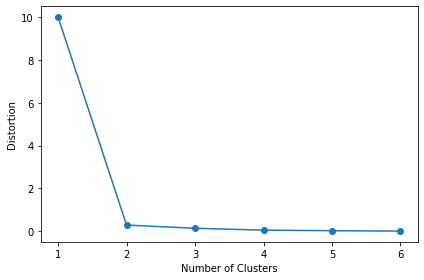

In [151]:
distortions = []
for i in range(1,7):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(pos_pol)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# ****
# Neural Network Creation Sector Of Program.
# ****

In [154]:
# Import relevant Python packages for building and utilizing of Feed Forward Neural Networks (FFNN) in Python.
import tensorflow as tf
import keras
import tensorflow.keras
from tensorflow.keras import layers
from keras import optimizers
import random
from random import randrange
from math import exp
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score

In [224]:
nn_df = sen_data.drop(columns=['tweet_id', 'Username', 'text', 'created_at'])

nn_df.head()

,Artist,sentiment,polarity
0,0,0,0.22
1,0,1,0.00
2,0,0,0.25
3,0,2,-0.20
4,0,0,0.15


In [262]:
nn_df.loc[nn_df['polarity'] < 0.0] = -1

nn_df.loc[nn_df['polarity'] == 0.0] = 0

nn_df.loc[nn_df['polarity'] > 0.0] = 1

nn_df.head()

,Artist,sentiment,polarity
0,1,1,1.00
1,0,0,0.00
2,1,1,1.00
3,-1,-1,-1.00
4,1,1,1.00


In [263]:
X_train, X_test, y_train, y_test = train_test_split(nn_df.drop(columns=['polarity']), nn_df['polarity'], test_size=0.30, random_state=13)

X_train
X_test
y_train
y_test


,Artist,sentiment
17,1,1
4,1,1
9,0,0
24,0,0
13,0,0
5,-1,-1
22,0,0
14,0,0
21,1,1
3,-1,-1


,Artist,sentiment
8,0,0
19,0,0
1,0,0
11,0,0
15,1,1
7,0,0
23,0,0
26,0,0
0,1,1


17    1.00
4     1.00
9     0.00
24    0.00
13    0.00
5    -1.00
22    0.00
14    0.00
21    1.00
3    -1.00
12   -1.00
20    1.00
2     1.00
6     0.00
25    1.00
10    1.00
16    1.00
18    0.00
Name: polarity, dtype: float64

8    0.00
19   0.00
1    0.00
11   0.00
15   1.00
7    0.00
23   0.00
26   0.00
0    1.00
Name: polarity, dtype: float64

In [282]:
sa_model = Sequential()

sa_model.add(keras.Input(shape=(2,)))
sa_model.add(Dense(10, activation='sigmoid'))
sa_model.add(Dense(1))

In [283]:
sa_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [284]:
callback00 = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)

callback01 = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)


In [285]:
sa_model_history = sa_model.fit(X_train, y_train, epochs=10, batch_size=10, callbacks=[callback00, callback01], validation_data=(X_test, y_test))

Epoch 1/10
2/2 [==============================] - 0s 133ms/step - loss: 3.3114e-08 - accuracy: 0.3889 - val_loss: 2.6491e-08 - val_accuracy: 0.7778
Epoch 2/10
2/2 [==============================] - 0s 26ms/step - loss: 3.3114e-08 - accuracy: 0.3889 - val_loss: 2.6491e-08 - val_accuracy: 0.7778
Epoch 3/10
2/2 [==============================] - 0s 24ms/step - loss: 3.3114e-08 - accuracy: 0.3889 - val_loss: 2.6491e-08 - val_accuracy: 0.7778
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 3.3114e-08 - accuracy: 0.3889 - val_loss: 2.6491e-08 - val_accuracy: 0.7778
Epoch 5/10
2/2 [==============================] - 0s 23ms/step - loss: 3.3114e-08 - accuracy: 0.3889 - val_loss: 2.6491e-08 - val_accuracy: 0.7778
Epoch 6/10
2/2 [==============================] - 0s 23ms/step - loss: 3.3114e-08 - accuracy: 0.3889 - val_loss: 2.6491e-08 - val_accuracy: 0.7778
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 3.3114e-08 - accuracy: 0.3889 - val_loss: 2.64

Text(0.5, 1.0, 'Backpropagated FFNN Accuracy per Epoch')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

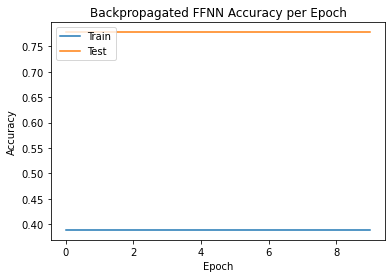

In [286]:
# Plot train data vs. test data accuracy scores per epoch of Backpropagated FFNN model.

plt.plot(sa_model_history.history['accuracy'])
plt.plot(sa_model_history.history['val_accuracy'])
plt.title('Backpropagated FFNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [287]:
sa_pred_x = sa_model.predict(X_train).round()
sa_pred_y = sa_model.predict(X_test).round()

1/1 [==============================] - 0s 16ms/step


In [288]:
sa_train_cm = confusion_matrix(y_train, sa_pred_x)
sa_train_cr = classification_report(y_train, sa_pred_x)

print(sa_train_cm)
print(sa_train_cr)

[[0 3 0]
 [0 7 0]
 [0 8 0]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         3
         0.0       0.39      1.00      0.56         7
         1.0       0.00      0.00      0.00         8

    accuracy                           0.39        18
   macro avg       0.13      0.33      0.19        18
weighted avg       0.15      0.39      0.22        18



/Users/ryanelsinga/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ryanelsinga/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ryanelsinga/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [289]:
sa_test_cm = confusion_matrix(y_test, sa_pred_y)
sa_test_cr = classification_report(y_test, sa_pred_y)

print(sa_test_cm)
print(sa_test_cr)

[[7 0]
 [2 0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88         7
         1.0       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



/Users/ryanelsinga/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ryanelsinga/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ryanelsinga/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [290]:
import seaborn as sns

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'FFNN Train Data Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

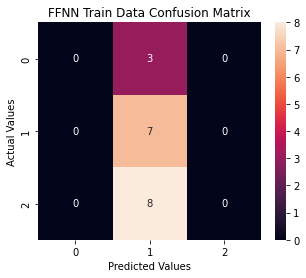

In [291]:
# FFNN Train Dataset Confusion Matrix.

plt.figure(figsize=(5,4))
sns.heatmap(sa_train_cm, annot=True)
plt.title('FFNN Train Data Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'FFNN Test Data Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

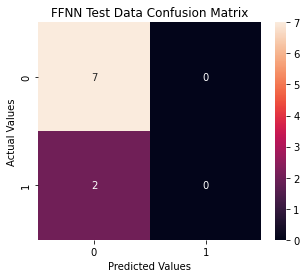

In [292]:
# FFNN Test Dataset Confusion Matrix.

plt.figure(figsize=(5,4))
sns.heatmap(sa_test_cm, annot=True)
plt.title('FFNN Test Data Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()